In [1]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
file_path = '/content/drive/MyDrive/PROVEDORES_SP/processed/Acessos_Banda_Larga_Fixa_2021-2024_Exportado.csv'
df = pd.read_csv(file_path)

# Análise do dataframe


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4399803 entries, 0 to 4399802
Data columns (total 14 columns):
 #   Column            Dtype  
---  ------            -----  
 0   ano               int64  
 1   mes               int64  
 2   grupo_economico   object 
 3   empresa           object 
 4   porte_prestadora  object 
 5   municipio         object 
 6   cod.municipio     int64  
 7   faixa_velocidade  object 
 8   velocidade        float64
 9   tecnologia        object 
 10  meio_acesso       object 
 11  tipo_pessoa       object 
 12  tipo_produto      object 
 13  acessos           int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 469.9+ MB


In [22]:
df.describe()

,ano,mes,cod.municipio,velocidade,acessos
count,4.399803e+06,4.399803e+06,4.399803e+06,4.399803e+06,4.399803e+06
mean,2.022416e+03,6.156585e+00,3.529873e+06,2.244155e+03,1.333721e+02
std,1.048345e+00,3.379643e+00,1.724425e+04,5.774567e+05,3.063397e+03
min,2.021000e+03,1.000000e+00,3.500105e+06,1.000000e-04,1.000000e+00
25%,2.022000e+03,3.000000e+00,3.514502e+06,8.000000e+00,1.000000e+00
50%,2.022000e+03,6.000000e+00,3.529401e+06,4.000000e+01,3.000000e+00
75%,2.023000e+03,9.000000e+00,3.547809e+06,2.000000e+02,1.600000e+01
max,2.024000e+03,1.200000e+01,3.557303e+06,6.553600e+08,7.091550e+05


#Evolução Temporal de Acessos

In [23]:
#Função que printa os acesso ao longo do ano independente da quantidade de anos
def plot_acessos_por_ano(df, ano, ax):

    df_ano = df[df['ano'] == ano]
    df_ano_grouped = df_ano.groupby('mes')['acessos'].sum().reset_index()
    total_acessos_ano = df_ano['acessos'].sum()

    ax.plot(df_ano_grouped['mes'], df_ano_grouped['acessos'], marker='.', linestyle='-', color='b')
    ax.set_title(f"2021 (Total: {total_acessos_ano:,})")
    ax.set_xlabel('Mês')
    ax.set_ylabel('Número de Acessos')
    ax.grid(True)
    ax.set_xticks(range(1, 13))
    ax.set_xticklabels(['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1_000_000:.1f}M'))

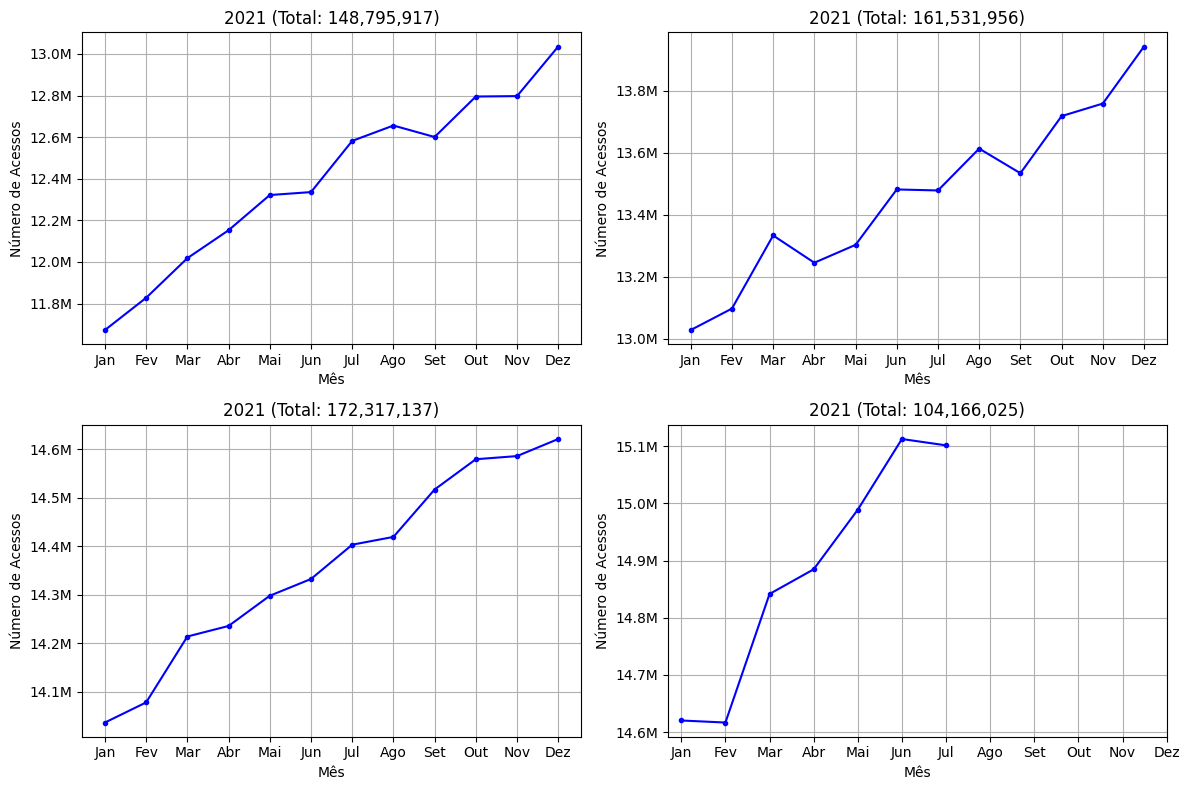

In [24]:
anos = [2021, 2022, 2023, 2024]

#plota os graficos em 2 colunas e 2 linhas
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axes = axes.flatten()

for i, ano in enumerate(anos):
    plot_acessos_por_ano(df, ano, axes[i])

plt.tight_layout()
plt.show()

# Quantidade de acessos por faixa de velocidade

In [25]:
#categorizando faixa de velocidade
bins = [0, 39, 200, float('inf')]
labels = ['Menos que 40mbps', '40 a 200mbps', 'Mais que 200mbps']

df['faixa_velocidade'] = pd.cut(df['velocidade'], bins=bins, labels=labels, right=True)

df_filtrado = df[(df['ano'] <= 2024) & (df['mes'] <= 7)]
df_velocidade = df_filtrado.groupby('faixa_velocidade')['acessos'].sum().reset_index()

<ipython-input-25-cae4537e1a08>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_velocidade = df_filtrado.groupby('faixa_velocidade')['acessos'].sum().reset_index()


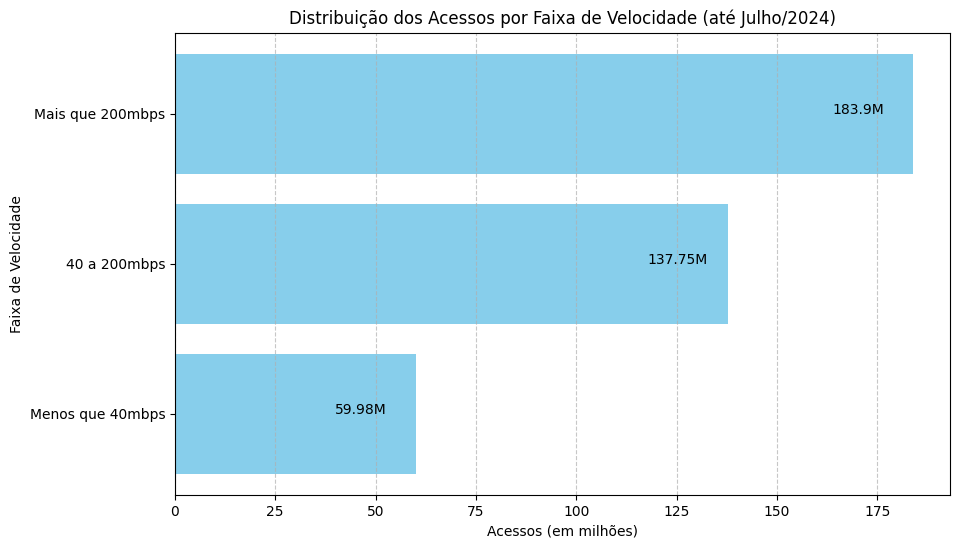

In [26]:
#Plota o gráfico somando os acessos total ao longo dos anos
plt.figure(figsize=(10, 6))
plt.barh(df_velocidade['faixa_velocidade'], df_velocidade['acessos'] / 1_000_000, color='skyblue')
plt.xlabel('Acessos (em milhões)')
plt.ylabel('Faixa de Velocidade')
plt.title('Distribuição dos Acessos por Faixa de Velocidade (até Julho/2024)')
plt.grid(axis='x', linestyle='--', alpha=0.7)

#Adicionar o valor total dentro de cada barra
for i, v in enumerate(df_velocidade['acessos'] / 1_000_000):
    plt.text(v - 20, i, str(round(v, 2)) + 'M', color='black', fontweight='regular')

plt.show()

<ipython-input-27-03331b6c8841>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_velocidade_ano = df_filtrado.groupby(['ano', 'faixa_velocidade'])['acessos'].sum().reset_index()


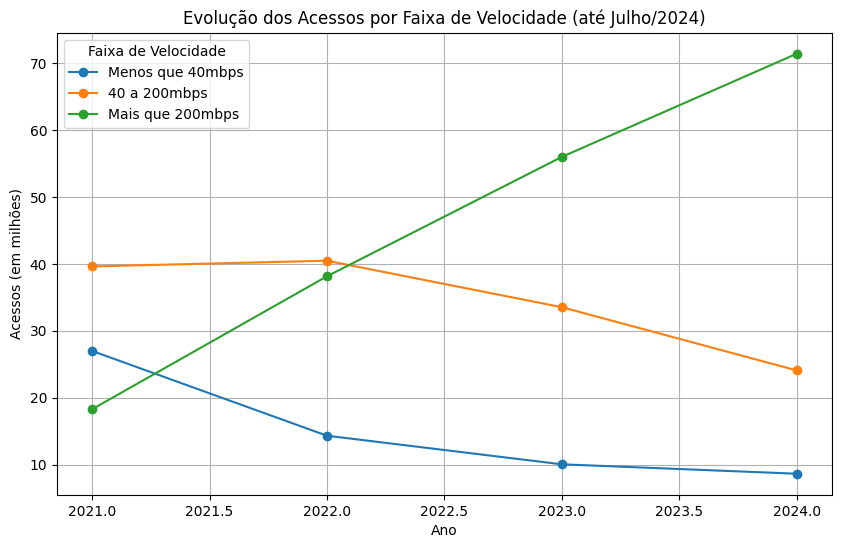

In [27]:
df_velocidade_ano = df_filtrado.groupby(['ano', 'faixa_velocidade'])['acessos'].sum().reset_index()

plt.figure(figsize=(10, 6))
for velocidade in df_velocidade_ano['faixa_velocidade'].unique():
    df_temp = df_velocidade_ano[df_velocidade_ano['faixa_velocidade'] == velocidade]
    plt.plot(df_temp['ano'], df_temp['acessos'] / 1_000_000, label=velocidade, marker='o')

plt.xlabel('Ano')
plt.ylabel('Acessos (em milhões)')
plt.title('Evolução dos Acessos por Faixa de Velocidade (até Julho/2024)')
plt.legend(title='Faixa de Velocidade')
plt.grid(True)
plt.show()

# Tecnologia de acesso


In [28]:
df_tecnologia = df.groupby(['tecnologia', 'ano', 'mes'], as_index=False)['acessos'].sum()

df_tecnologia['tecnologia_filtrada'] = df_tecnologia.apply(
    lambda x: 'Outros' if x['acessos'] < 200000 else x['tecnologia'], axis=1
)
df_tecnologia.drop(['tecnologia'], axis=1, inplace=True)


df_tecnologia_acessos = df_tecnologia.groupby('tecnologia_filtrada', as_index=False)['acessos'].sum()

In [29]:
df_tecnologia_acessos = df_tecnologia_acessos.set_index('tecnologia_filtrada').sort_index()

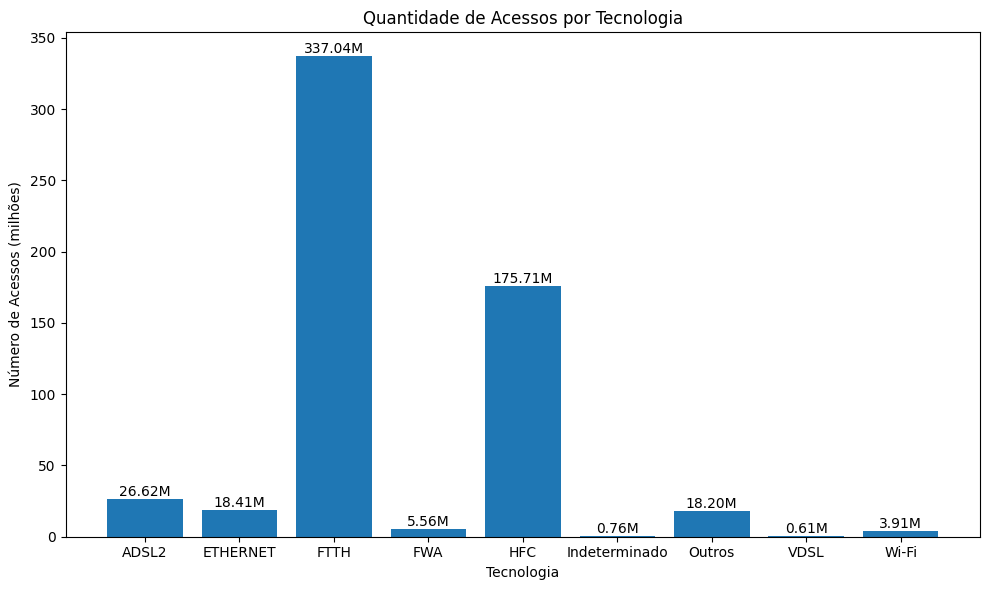

In [30]:
# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(df_tecnologia_acessos.index, (df_tecnologia_acessos['acessos'] / 1_000_000))

# Adicionando o valor total em cima de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}M', ha='center', va='bottom')


plt.title('Quantidade de Acessos por Tecnologia')
plt.xlabel('Tecnologia')
plt.ylabel('Número de Acessos (milhões)')

plt.tight_layout()
plt.show()

In [31]:
def plotar_evolucao_acessos(df, ano, ax):
    df_agrupado = df.groupby(['ano', 'mes', 'tecnologia_filtrada'])['acessos'].sum().unstack()
    df_tech_ano = df_agrupado.loc[ano]

    df_tech_ano.plot(kind='line', ax=ax)
    ax.set_title(f"Evolução dos Acessos por Tecnologia em {ano}")
    ax.set_xlabel('Mês')
    ax.set_ylabel('Número de Acessos')
    ax.legend(title='Tecnologia')
    ax.set_xticks(range(1, 13))
    ax.set_xticklabels(['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])

    if df_tech_ano.max().max() > 1000000:
        ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1_000_000:.1f}M'))
    else:
        ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,}'))

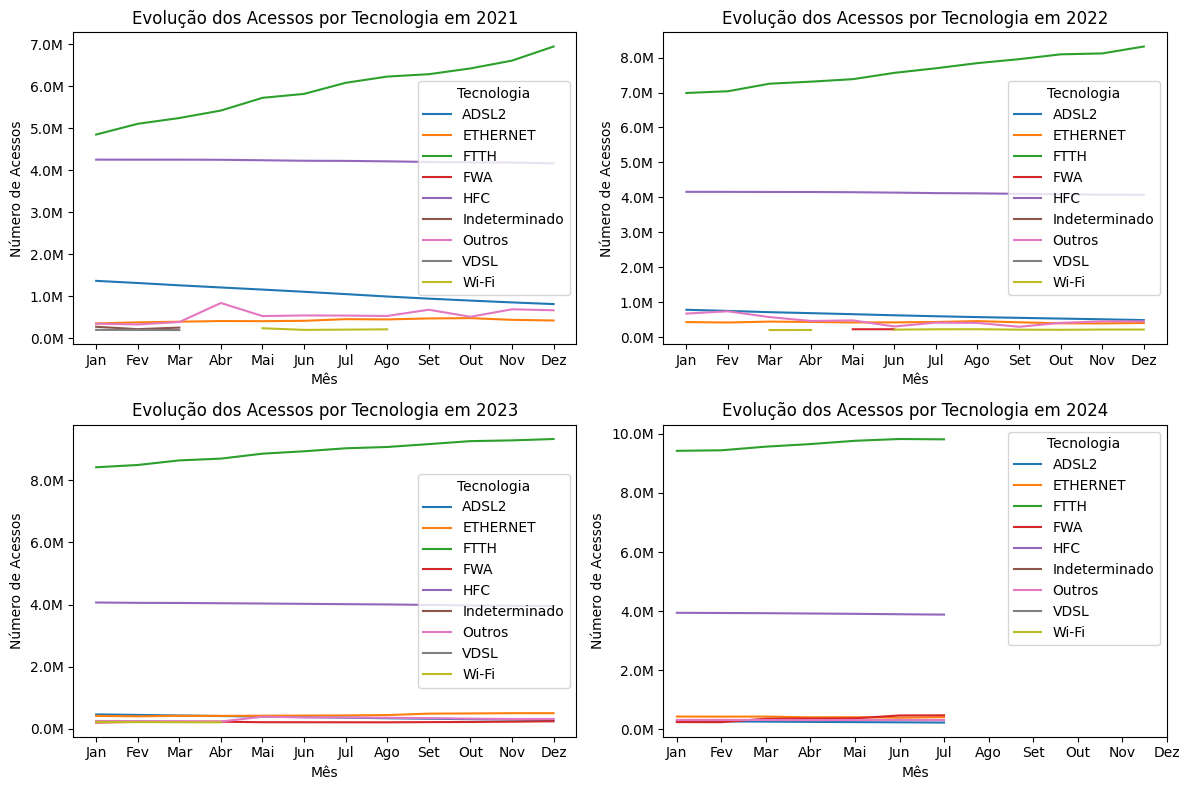

In [32]:
anos = [2021, 2022, 2023, 2024]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axes = axes.flatten()

for i, ano in enumerate(anos):
    plotar_evolucao_acessos(df_tecnologia, ano, axes[i])

plt.tight_layout()
plt.show()

# Acessos por porte de prestadora

In [33]:
df_porte_prestadora = df.groupby(['ano', 'mes', 'porte_prestadora'])['acessos'].sum().reset_index()
df_porte_prestadora['semestre'] = df_porte_prestadora['mes'].apply(lambda x: 1 if x <= 6 else 2)
df_porte_prestadora['ano_semestre'] = df_porte_prestadora.apply(lambda row: f"{row['ano']}-S{row['semestre']}", axis=1)

#dividindo o gráfico por semestres
df_filtered = df_porte_prestadora[~((df_porte_prestadora['ano'] == 2024) & (df_grouped['semestre'] == 2))]
df_semestre_prestadora = df_filtered.groupby(['ano_semestre', 'porte_prestadora'])['acessos'].sum().reset_index()
portes = df_semestre_prestadora['porte_prestadora'].unique()

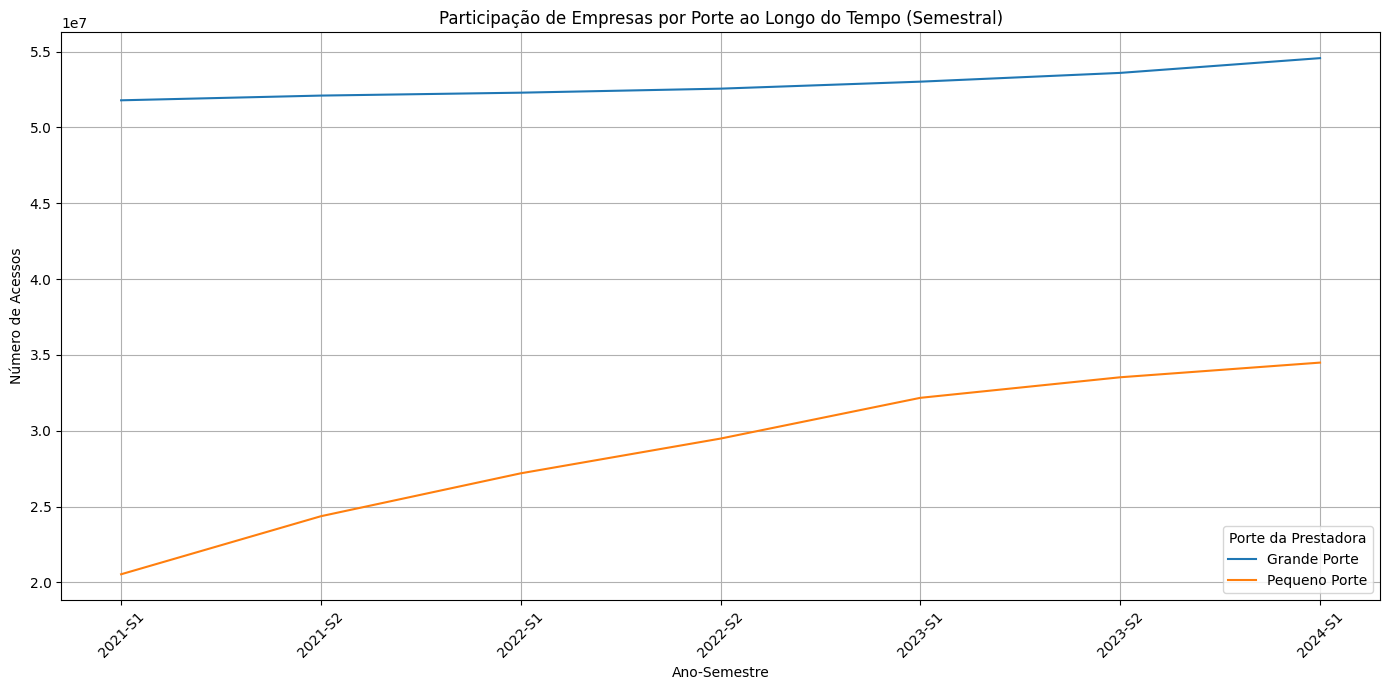

In [34]:
plt.figure(figsize=(14, 7))
for porte in portes:
    df_porte = df_semestre_prestadora[df_semestre_prestadora['porte_prestadora'] == porte]
    plt.plot(df_porte['ano_semestre'], df_porte['acessos'], label=porte)

plt.title('Participação de Empresas por Porte ao Longo do Tempo (Semestral)')
plt.xlabel('Ano-Semestre')
plt.ylabel('Número de Acessos')
plt.legend(title='Porte da Prestadora')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

# Acessos por municipio

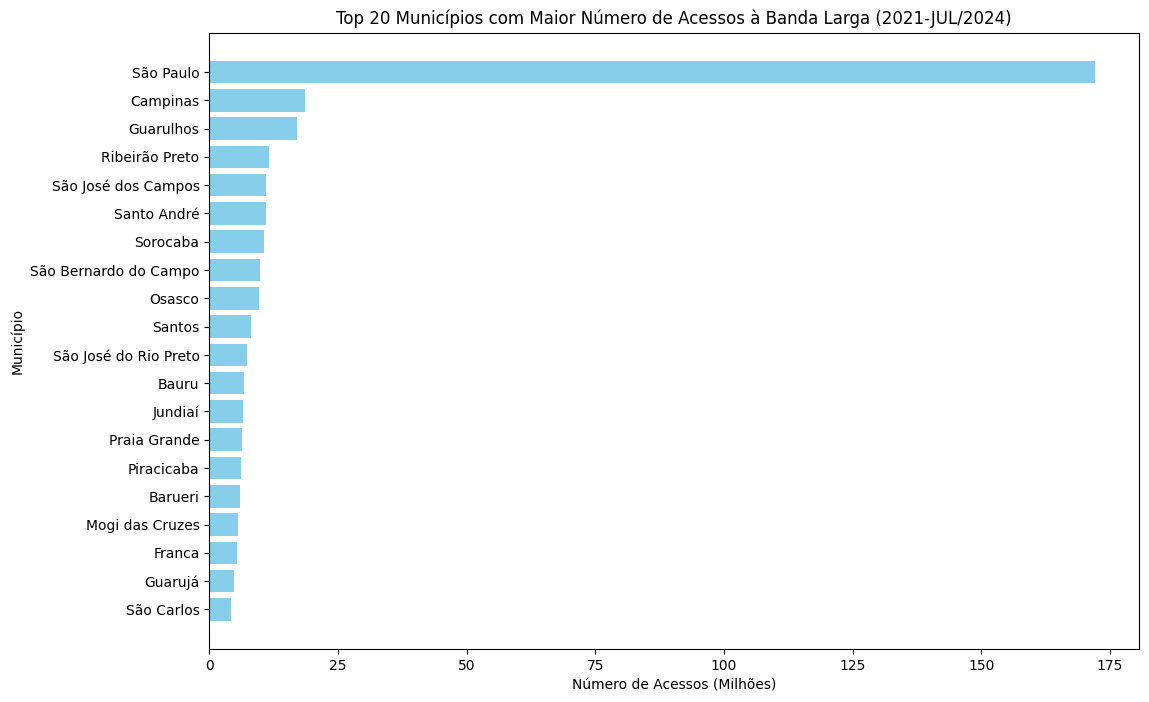

In [35]:
df_municipio_acessos = df.groupby('municipio')['acessos'].sum().reset_index()
df_municipio_acessos = df_municipio_acessos.sort_values(by='acessos', ascending=False).head(20)
df_municipio_acessos['acessos_milhoes'] = df_municipio_acessos['acessos'] / 1e6

plt.figure(figsize=(12, 8))
plt.barh(df_municipio_acessos['municipio'], df_municipio_acessos['acessos_milhoes'], color='skyblue')
plt.xlabel('Número de Acessos (Milhões)')
plt.ylabel('Município')
plt.title('Top 20 Municípios com Maior Número de Acessos à Banda Larga (2021-JUL/2024)')
plt.gca().invert_yaxis()

plt.show()

# Acessos por Grupos Empresariais

In [17]:
df.columns

Index(['ano', 'mes', 'grupo_economico', 'empresa', 'porte_prestadora',
       'municipio', 'cod.municipio', 'faixa_velocidade', 'velocidade',
       'tecnologia', 'meio_acesso', 'tipo_pessoa', 'tipo_produto', 'acessos'],
      dtype='object')

In [4]:
df['grupo_economico'] = df['grupo_economico'].replace({'TELEFÔNICA': 'TELEFONICA'})
df_grupo_economico = df.groupby('grupo_economico')['acessos'].sum().reset_index()
df_grupo_economico ['acessos'] = df_grupo_economico ['acessos'] / 1_000_000

threshold = 5
df_grupo_economico ['grupo_economico'] = df_grupo_economico .apply(
    lambda row: 'OUTROS' if row['acessos'] < threshold else row['grupo_economico'], axis=1
)

df_grupo_economico  = df_grupo_economico .groupby('grupo_economico')['acessos'].sum().reset_index()
df_grupo_economico  = df_grupo_economico .sort_values(by='grupo_economico', ascending=True)

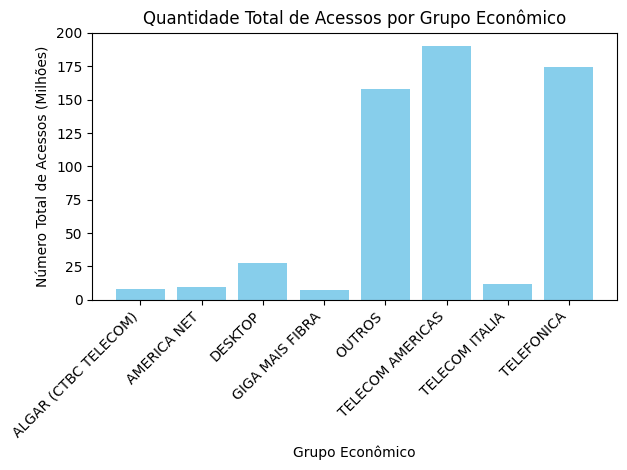

In [5]:
plt.bar(df_grupo_economico ['grupo_economico'], df_grupo_economico ['acessos'], color='skyblue')
plt.xlabel('Grupo Econômico')
plt.ylabel('Número Total de Acessos (Milhões)')
plt.title('Quantidade Total de Acessos por Grupo Econômico')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

In [14]:
df_julho = df[(df['ano'] >= 2021) & ((df['ano'] < 2024) | ((df['ano'] == 2024) & (df['mes'] <= 7)))]

df_julho['acessos_milhoes'] = df_julho['acessos'] / 1_000_000
df_periodo = df_julho.groupby(['ano', 'mes', 'grupo_economico'])['acessos_milhoes'].sum().reset_index()

df_periodo['periodo'] = df_periodo['ano'].astype(str) + '-' + df_periodo['mes'].astype(str).str.zfill(2)

df_pivot = df_periodo.pivot(index='periodo', columns='grupo_economico', values='acessos_milhoes')

df_total_acessos = df_periodo.groupby('grupo_economico')['acessos_milhoes'].sum().sort_values(ascending=False)
df_pivot = df_pivot[df_total_acessos.index]

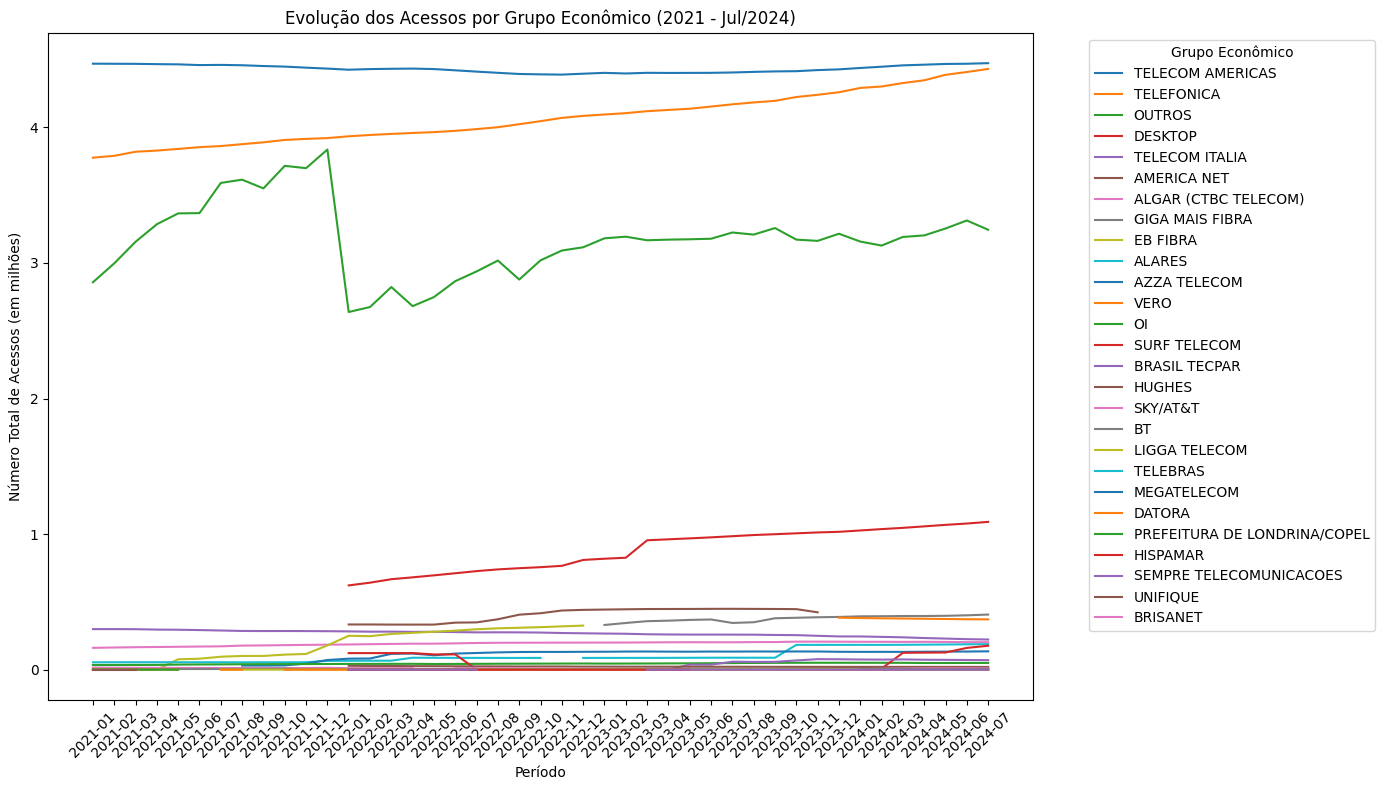

In [15]:
plt.figure(figsize=(14, 8))
for column in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[column], label=column)


plt.xlabel('Período')
plt.ylabel('Número Total de Acessos (em milhões)')
plt.title('Evolução dos Acessos por Grupo Econômico (2021 - Jul/2024)')
plt.xticks(rotation=45)
plt.legend(title='Grupo Econômico', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()


plt.show()

Fim, obrigado pela sua atenção até aqui!
